In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flood-area-segmentation/metadata.csv
/kaggle/input/flood-area-segmentation/Mask/1017.png
/kaggle/input/flood-area-segmentation/Mask/2015.png
/kaggle/input/flood-area-segmentation/Mask/1084.png
/kaggle/input/flood-area-segmentation/Mask/2021.png
/kaggle/input/flood-area-segmentation/Mask/1012.png
/kaggle/input/flood-area-segmentation/Mask/48.png
/kaggle/input/flood-area-segmentation/Mask/3012.png
/kaggle/input/flood-area-segmentation/Mask/1037.png
/kaggle/input/flood-area-segmentation/Mask/2009.png
/kaggle/input/flood-area-segmentation/Mask/1023.png
/kaggle/input/flood-area-segmentation/Mask/3070.png
/kaggle/input/flood-area-segmentation/Mask/37.png
/kaggle/input/flood-area-segmentation/Mask/1048.png
/kaggle/input/flood-area-segmentation/Mask/3068.png
/kaggle/input/flood-area-segmentation/Mask/1000.png
/kaggle/input/flood-area-segmentation/Mask/35.png
/kaggle/input/flood-area-segmentation/Mask/2030.png
/kaggle/input/flood-area-segmentation/Mask/1081.png
/kaggle/input/flood

In [2]:
# !wget --quiet https://github.com/sizhky/torch_snippets.git
!pip install torch_snippets
from torch_snippets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 46.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 70.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 60.9 MB/s eta 0:00:00:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=83f7da5bda8e19cf4742283f2fb47064cf207d23bd14edc479c33a8657c7ecb4
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing
  Attempt

In [4]:
# from torch_snippets import *
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T, models, datasets
from xml.etree import ElementTree as et
import torchvision
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# **0. Создаем 2 списка: путей каритнок и путей аннотаций**

In [ ]:
# /kaggle/input/flood-area-segmentation/Image/10.jpg
# /kaggle/input/flood-area-segmentation/Mask/10.png

In [88]:
# mask_files = glob.glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
image = sorted(glob.glob('/kaggle/input/flood-area-segmentation/Image/*'))
mask = sorted(glob.glob('/kaggle/input/flood-area-segmentation/Mask/*'))

print(image[:2])
print(mask[:2])
print(len(image))
print(len(mask))

['/kaggle/input/flood-area-segmentation/Image/0.jpg', '/kaggle/input/flood-area-segmentation/Image/1.jpg']
['/kaggle/input/flood-area-segmentation/Mask/0.png', '/kaggle/input/flood-area-segmentation/Mask/1.png']
290
290


In [89]:
image[:20]

['/kaggle/input/flood-area-segmentation/Image/0.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1.jpg',
 '/kaggle/input/flood-area-segmentation/Image/10.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1000.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1001.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1002.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1003.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1004.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1005.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1006.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1007.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1008.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1009.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1010.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1011.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1012.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1013.jpg',
 '/kaggle/input/flood-area-segmentation

In [90]:
mask[:20]

['/kaggle/input/flood-area-segmentation/Mask/0.png',
 '/kaggle/input/flood-area-segmentation/Mask/1.png',
 '/kaggle/input/flood-area-segmentation/Mask/10.png',
 '/kaggle/input/flood-area-segmentation/Mask/1000.png',
 '/kaggle/input/flood-area-segmentation/Mask/1001.png',
 '/kaggle/input/flood-area-segmentation/Mask/1002.png',
 '/kaggle/input/flood-area-segmentation/Mask/1003.png',
 '/kaggle/input/flood-area-segmentation/Mask/1004.png',
 '/kaggle/input/flood-area-segmentation/Mask/1005.png',
 '/kaggle/input/flood-area-segmentation/Mask/1006.png',
 '/kaggle/input/flood-area-segmentation/Mask/1007.png',
 '/kaggle/input/flood-area-segmentation/Mask/1008.png',
 '/kaggle/input/flood-area-segmentation/Mask/1009.png',
 '/kaggle/input/flood-area-segmentation/Mask/1010.png',
 '/kaggle/input/flood-area-segmentation/Mask/1011.png',
 '/kaggle/input/flood-area-segmentation/Mask/1012.png',
 '/kaggle/input/flood-area-segmentation/Mask/1013.png',
 '/kaggle/input/flood-area-segmentation/Mask/1014.png',


# **1. Смотрим картинки**

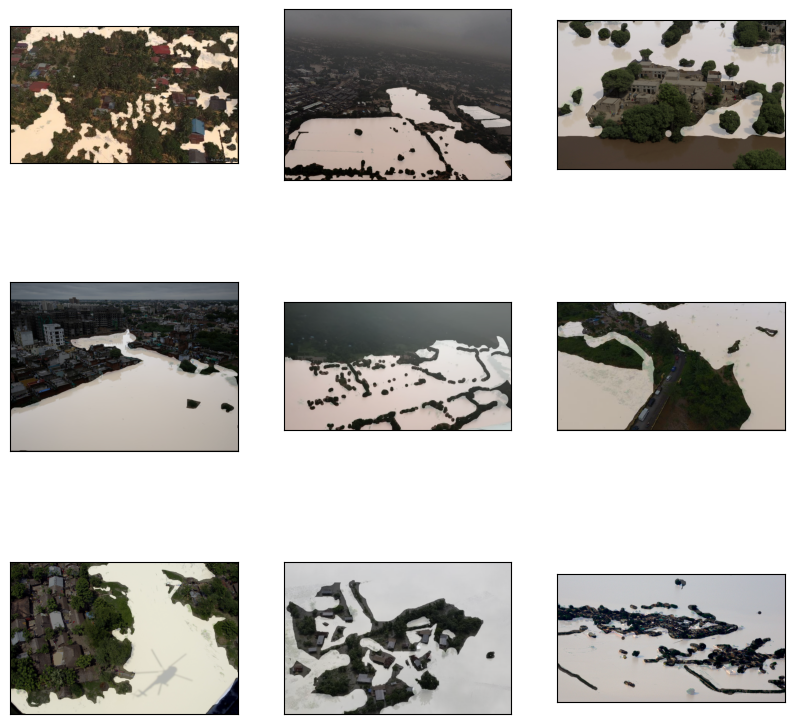

In [91]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=image[i]
    msk_path=mask[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.5)
    plt.xticks([]), plt.yticks([])
plt.show()

# **3. Смотрим аннотации (изображения)**

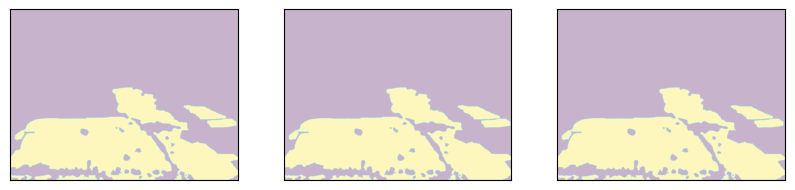

In [92]:
rows,cols=1,3
fig=plt.figure(figsize=(10,10))
for i in np.arange(1,4):
    fig.add_subplot(rows,cols,i)
    msk_path=mask[2]
    msk=cv2.imread(msk_path)
    plt.imshow(msk.transpose(-1,0,1)[i-1],alpha=0.3)
    plt.xticks([]), plt.yticks([])
plt.show()

# **4. Смотрим содержимое каналов маски**

In [93]:
# читаем картинку маски, 4меняем каналы местасми на (3,250,250),
an = cv2.imread(mask[2], 1).transpose(2,0,1)#/255
r,g,b = an

lst = []
for _ in [0,1,2]:
    k = r,g,b
    h = 'rgb'
    for i in k[_]:
        for j in i:
            if j not in lst: lst.append(j)
    print(f'Значения в канале {h[_]}: {lst}')

Значения в канале r: [0, 40, 79, 118, 158, 52, 13, 105, 171, 219, 227, 236, 244, 222, 116, 198, 214, 233, 247, 255, 125, 92, 145, 185, 252, 83, 187, 230, 241, 249, 66, 221, 232, 87, 184, 213, 134, 157, 197, 224, 178, 49, 65, 144, 210, 235, 243, 26, 207, 194, 53, 192, 91, 203, 251, 50, 131, 238, 200, 253, 163, 152, 124, 237, 201, 216, 223, 114, 71, 234, 119, 229, 170, 39, 180, 246, 191, 231, 121, 153, 58, 64, 57, 9, 164, 25, 3, 93, 146, 12, 99, 217, 23, 54, 204, 51, 86, 151, 48, 32, 177, 38, 30, 165, 155, 103, 27, 100, 90, 142, 55, 228, 168, 240, 181, 77, 24, 37, 209, 225, 182, 16, 78, 31, 10, 140, 20, 128, 60, 96, 154, 218, 212, 193, 141, 186, 89, 41, 136, 6, 115, 73, 245, 239, 80, 208, 166, 248, 211, 70, 111, 63, 175, 202, 42, 137, 22, 176, 112, 205, 138, 95, 7, 88, 108, 84, 179, 75, 43, 242, 101, 196, 189, 195, 117, 143, 61, 127, 104, 148, 162, 139, 110, 74, 21, 8, 62, 226, 173, 160, 159, 161, 47, 135, 206, 4, 14, 29, 130, 15, 215, 44, 199, 122, 35, 81, 133, 2, 11, 174, 18, 69, 109, 

**т.е. нужно все значения маски которые больше 0 перевести в 1**

# **5. Удаляем пустые маски и соотвествующие картинки, на выходе 2 сортированных списка**

In [94]:
len(mask)

290

In [96]:
# функция сортировки:
def sort(elem):
    return elem.split('/')[-1]

In [97]:
annots = []
for ann in Tqdm(mask):
    _ann = cv2.imread(ann, 1).transpose(2,0,1)#/255
    _ann[_ann > 0 ] = 1 # переводит все значения >0 в единицу 1
    r,g,b = _ann
    if 1 not in np.unique(r): continue # отсеиваем маски в которых нет аномалии
    annots.append(ann)
print(f'Количество элементов: {len(annots)}')
print(f'Количество уникальных элементов: {len(set(annots))}')

pictures = image
pictures.sort(key=sort)
annots.sort(key=sort)

100%|██████████| 290/290 [00:12<00:00, 23.51it/s]

Количество элементов: 290
Количество уникальных элементов: 290


In [99]:
pictures[:20]

['/kaggle/input/flood-area-segmentation/Image/0.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1.jpg',
 '/kaggle/input/flood-area-segmentation/Image/10.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1000.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1001.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1002.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1003.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1004.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1005.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1006.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1007.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1008.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1009.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1010.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1011.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1012.jpg',
 '/kaggle/input/flood-area-segmentation/Image/1013.jpg',
 '/kaggle/input/flood-area-segmentation

In [101]:
annots[:20]

['/kaggle/input/flood-area-segmentation/Mask/0.png',
 '/kaggle/input/flood-area-segmentation/Mask/1.png',
 '/kaggle/input/flood-area-segmentation/Mask/10.png',
 '/kaggle/input/flood-area-segmentation/Mask/1000.png',
 '/kaggle/input/flood-area-segmentation/Mask/1001.png',
 '/kaggle/input/flood-area-segmentation/Mask/1002.png',
 '/kaggle/input/flood-area-segmentation/Mask/1003.png',
 '/kaggle/input/flood-area-segmentation/Mask/1004.png',
 '/kaggle/input/flood-area-segmentation/Mask/1005.png',
 '/kaggle/input/flood-area-segmentation/Mask/1006.png',
 '/kaggle/input/flood-area-segmentation/Mask/1007.png',
 '/kaggle/input/flood-area-segmentation/Mask/1008.png',
 '/kaggle/input/flood-area-segmentation/Mask/1009.png',
 '/kaggle/input/flood-area-segmentation/Mask/1010.png',
 '/kaggle/input/flood-area-segmentation/Mask/1011.png',
 '/kaggle/input/flood-area-segmentation/Mask/1012.png',
 '/kaggle/input/flood-area-segmentation/Mask/1013.png',
 '/kaggle/input/flood-area-segmentation/Mask/1014.png',


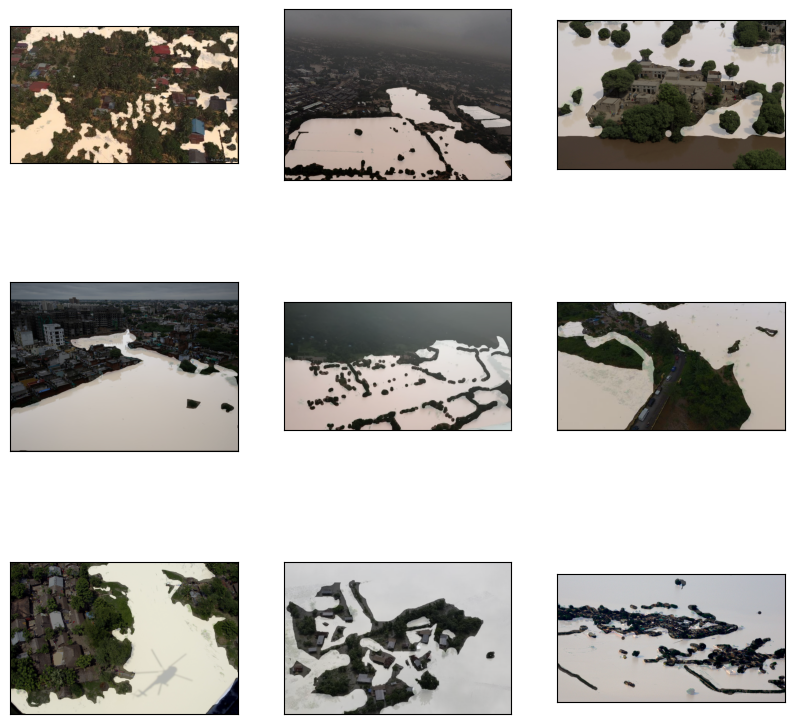

In [102]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=pictures[i]
    msk_path=annots[i]
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.5)
    plt.xticks([]), plt.yticks([])
plt.show()

**как видим - отсутствуют пустые маски!!!**

# **6. Создаем dataframe**

In [103]:
name_col = ['pictures', 'annotations']
lst = pictures, annots
df = pd.DataFrame(np.column_stack(lst), columns = name_col)
print(df.iloc[0,0])
print(df.iloc[0,1])

/kaggle/input/flood-area-segmentation/Image/0.jpg
/kaggle/input/flood-area-segmentation/Mask/0.png


In [104]:
df.shape

(290, 2)

In [105]:
# попарно выводим первый и второй столбец df
for _ in np.arange(4):
    print(df.iloc[_,0])
    print(df.iloc[_,1])

/kaggle/input/flood-area-segmentation/Image/0.jpg
/kaggle/input/flood-area-segmentation/Mask/0.png
/kaggle/input/flood-area-segmentation/Image/1.jpg
/kaggle/input/flood-area-segmentation/Mask/1.png
/kaggle/input/flood-area-segmentation/Image/10.jpg
/kaggle/input/flood-area-segmentation/Mask/10.png
/kaggle/input/flood-area-segmentation/Image/1000.jpg
/kaggle/input/flood-area-segmentation/Mask/1000.png


In [106]:
df.head(5)

,pictures,annotations
0,/kaggle/input/flood-area-segmentation/Image/0.jpg,/kaggle/input/flood-area-segmentation/Mask/0.png
1,/kaggle/input/flood-area-segmentation/Image/1.jpg,/kaggle/input/flood-area-segmentation/Mask/1.png
2,/kaggle/input/flood-area-segmentation/Image/10...,/kaggle/input/flood-area-segmentation/Mask/10.png
3,/kaggle/input/flood-area-segmentation/Image/10...,/kaggle/input/flood-area-segmentation/Mask/100...
4,/kaggle/input/flood-area-segmentation/Image/10...,/kaggle/input/flood-area-segmentation/Mask/100...


# **7. train_test_split**

In [108]:
# Разбивка данных на основе столбца с именами картинок в df
from sklearn.model_selection import train_test_split
# trn_ids, val_ids = train_test_split(df.pictures.nunique(), test_size=0.1, random_state=99)
trn_ids, val_ids = train_test_split(df.pictures, test_size=0.1, random_state=99)
# trn_ids = list(trn_ids)
# val_ids = list(val_ids)
# типа разбивка df на train_df и val_df на основе разбивки train_test_split
trn_df, val_df = df[df['pictures'].isin(trn_ids)], df[df['pictures'].isin(val_ids)]
#print(trn_df, val_df)
print(f'для тренировки: {len(trn_df)}'), 
print(f'для проверки: {len(val_df)}')

для тренировки: 261
для проверки: 29


# **8. Трансформации**

In [155]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

# **9. Создаем DataLoader**

In [144]:
df.head(4)

,pictures,annotations
0,/kaggle/input/flood-area-segmentation/Image/0.jpg,/kaggle/input/flood-area-segmentation/Mask/0.png
1,/kaggle/input/flood-area-segmentation/Image/1.jpg,/kaggle/input/flood-area-segmentation/Mask/1.png
2,/kaggle/input/flood-area-segmentation/Image/10...,/kaggle/input/flood-area-segmentation/Mask/10.png
3,/kaggle/input/flood-area-segmentation/Image/10...,/kaggle/input/flood-area-segmentation/Mask/100...


In [150]:
read(pictures[8], 1).max()

255

In [156]:
class SegData(Dataset):
    def __init__(self, df):
        self.pictures = df.pictures.tolist()
        self.annotations = df.annotations.tolist()
    def __len__(self):
        return len(self.pictures)
    def __getitem__(self, ix):
        image = read(self.pictures[ix], 1)[..., ::-1]
#         print(image.shape)
        image = cv2.resize(image, (224,224))
#         print(image.shape)
        mask = read(self.annotations[ix])
        mask[mask > 0] = 1
#         print(mask.shape)
        mask = cv2.resize(mask, (224,224))
#         print(mask.shape)
        return image.shape, mask.transpose(-1,0,1)
    def choose(self): return self[randint(len(self))]
    def collate_fn(self, batch):
        ims, masks = list(zip(*batch))
        ims = torch.cat([tfms(im.copy()/255.)[None] for im in ims]).float().to(device)
        ce_masks = torch.cat([torch.Tensor(mask[0][None]) for mask in masks]).long().to(device)
        return ims, ce_masks

In [157]:
trn_ds = SegData(df)
val_ds = SegData(df)
trn_dl = DataLoader(trn_ds, batch_size=4, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=1, shuffle=True, collate_fn=val_ds.collate_fn)

In [158]:
for i in trn_ds:
    print(i)
    break

TypeError: 'NoneType' object is not subscriptable

In [135]:
for i in trn_ds:
    print(i[0].shape)
    break

TypeError: 'NoneType' object is not subscriptable

# **10. Смотрим картинку, маску и картинку с наложенной маской (в одну строку)**

In [132]:
x = iter(trn_ds)

In [133]:
# входные данные должны быть размера (224, 224, 3) и (3, 224, 224)
im,m = next(x)
print(im.shape)
print(m.shape)
fig, ax = plt.subplots(1,3)
ax[0].imshow(im)
ax[1].imshow(m[2])
ax[2].imshow(im)
ax[2].imshow(m[2],alpha=0.3)
plt.xticks([]), plt.yticks([])
plt.show

TypeError: 'NoneType' object is not subscriptable